In [1]:
#import modules
import pandas as pd  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import numpy as np
import time
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from scipy.stats import gaussian_kde

In [2]:
dframe=pd.read_csv('HR_comma_sep.csv', delimiter=";")

In [3]:
dframe.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Fungsi deskripsikan () di panda berguna untuk mendapatkan berbagai statistik ringkasan. Fungsi ini mengembalikan jumlah, rata-rata, standar deviasi, nilai minimum dan maksimum, serta kuantil data.

In [4]:
dframe.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
dframe.isna().sum()

## Preprocesing ##

Disini, kita perlu mengalisis variable dataset yang kita gunakan. Dalam penelitian ini variabel left akan dihapus karena variabel ini adalah target data sedangkan penelitian ini adalah clustering.

In [6]:
# get the start time
st = time.time()

## Konversi

In [7]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
dframe['Departments']=le.fit_transform(dframe['Departments'])
dframe['salary']=le.fit_transform(dframe['salary'])

## Korelasi Data

In [8]:
corr = dframe.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
Departments,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


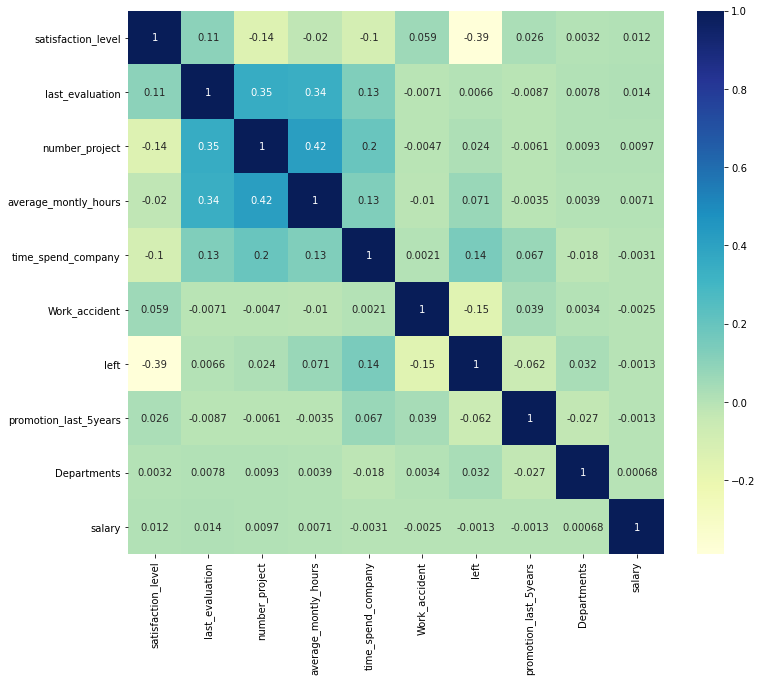

In [9]:
myplt = plt.figure(figsize=(12,10))
sns.heatmap(dframe.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Menghapus atribut target

In [10]:
## Menghapus colomn yang tidak ada korelasi
##dframe.drop(columns='satisfaction_level',inplace=True)
dframe.drop(columns='left', inplace=True)

In [11]:
dframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


## Standardize dan Normalize

In [12]:
# standardize data using 
# Feature scaling using StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(dframe)

# create new dataframe from standardized data
standardized_df = pd.DataFrame(standardized_data, columns=dframe.columns)

norm_dframe = normalize(standardized_df)
print(norm_dframe)

[[-0.39063447 -0.45352869 -0.61019532 ... -0.06148902  0.16423218
  -0.23148491]
 [ 0.26491235  0.2958414   0.34173075 ... -0.05187363  0.13855026
   0.36702876]
 [-0.51697292  0.2447638   0.66300092 ... -0.03768045  0.10064143
   0.26660577]
 ...
 [-0.37473423 -0.4171521  -0.56125284 ... -0.05655711  0.28480251
  -0.21291799]
 [-0.56169275  0.39574239  0.49502744 ... -0.04093993  0.20615966
  -0.15412469]
 [-0.38864367 -0.4558833  -0.5820855  ... -0.05865641  0.29537385
  -0.22082111]]


## PCA

In [13]:
pca = PCA()
pca.fit_transform(norm_dframe)

array([[-0.86254489,  0.18516808,  0.22319735, ..., -0.05298795,
        -0.2515214 , -0.01659866],
       [ 0.79251296, -0.12459185, -0.30142452, ...,  0.48937025,
        -0.12061443, -0.02993547],
       [ 0.66710721,  0.33248304, -0.27564299, ..., -0.21703103,
         0.21795122, -0.00340515],
       ...,
       [-0.85457425,  0.10813139,  0.24743187, ..., -0.04493596,
        -0.18943145, -0.01060925],
       [ 0.69781806,  0.3923991 ,  0.15577431, ..., -0.28973413,
         0.0088709 , -0.00426936],
       [-0.83428207,  0.11705139,  0.25949926, ..., -0.04583778,
        -0.245308  , -0.01214571]])

In [14]:
variance_ratio=pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)

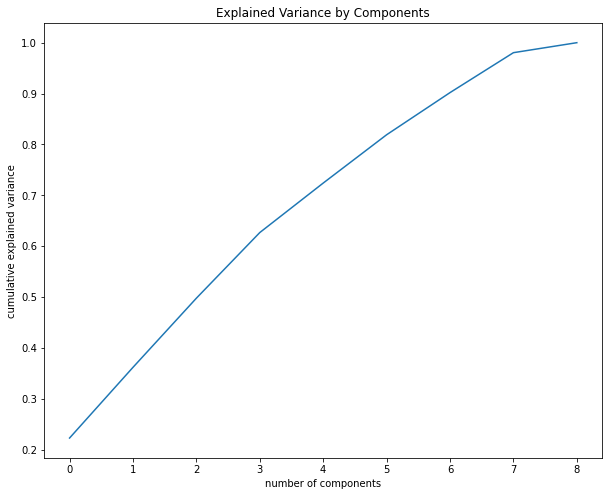

In [15]:
plt.figure(figsize=(10,8))
plt.plot(cumulative_variance)
plt.title('Explained Variance by Components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [16]:
n_components = np.where(cumulative_variance>=0.95)[0][0]+1
print("Number of component Selected :",n_components, "Cumulative Variance : ",sum(pca.explained_variance_ratio_))

Number of component Selected : 8 Cumulative Variance :  1.0


## Ringkasan PCA

In [17]:
n_components=8
pca_final = PCA(n_components=n_components)
pca_final.fit_transform(norm_dframe)
pca_Data = pca_final.fit_transform(norm_dframe)

In [18]:
pca_ccData = pd.DataFrame(data=pca_Data, columns=['Components 1', 'Components 2','Components 3',
                                                  'Components 4','Components 5', 'Components 6','Components 7','Component 8'])
pca_ccData

,Components 1,Components 2,Components 3,Components 4,Components 5,Components 6,Components 7,Component 8
0,-0.862545,0.185168,0.223197,-0.222353,-0.031881,-0.145458,-0.052988,-0.251521
1,0.792513,-0.124592,-0.301425,-0.192343,0.043316,-0.004016,0.489370,-0.120614
2,0.667107,0.332483,-0.275643,-0.539646,-0.127623,-0.107517,-0.217031,0.217951
3,0.816480,0.048977,0.321528,-0.109116,0.189419,-0.190268,0.399123,0.083408
4,-0.859168,0.198707,0.218147,-0.234429,-0.052871,-0.131802,-0.051417,-0.253408
...,...,...,...,...,...,...,...,...
14994,-0.828410,0.065697,0.280482,-0.289691,0.064087,-0.183651,-0.069085,-0.248052
14995,-0.844784,0.130238,0.245986,-0.333079,-0.078351,-0.071866,-0.010342,-0.224517
14996,-0.854574,0.108131,0.247432,-0.304853,0.056189,-0.159025,-0.044936,-0.189431
14997,0.697818,0.392399,0.155774,-0.509690,-0.075169,-0.168883,-0.289734,0.008871


## Melihat Komponen Utama

In [19]:
for i in np.arange(n_components):
    index =  np.argmax(np.absolute(pca_final.get_covariance()[i]))
    max_cov = pca_final.get_covariance()[i][index]
    column = dframe.columns[index]
    print("Principal Component", i+1, "maximum covariance :", "{:.2f}".format(max_cov), "from column", column)

Principal Component 1 maximum covariance : 0.12 from column satisfaction_level
Principal Component 2 maximum covariance : 0.14 from column last_evaluation
Principal Component 3 maximum covariance : 0.12 from column number_project
Principal Component 4 maximum covariance : 0.13 from column average_montly_hours
Principal Component 5 maximum covariance : 0.10 from column time_spend_company
Principal Component 6 maximum covariance : 0.09 from column Work_accident
Principal Component 7 maximum covariance : 0.02 from column promotion_last_5years
Principal Component 8 maximum covariance : 0.13 from column Departments


## Clustering

## Evaluasi K (jumlah cluster) terbaik

## 1. ELbow

In [20]:
kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}
k_range = range(1,8)
sse = []
for i in k_range:
    kmeans_pca = KMeans(n_clusters=i, **kmeans_kwargs)
    kmeans_pca.fit_transform(pca_ccData)
    sse.append(kmeans_pca.inertia_)

Elbow point is at 3 clusters


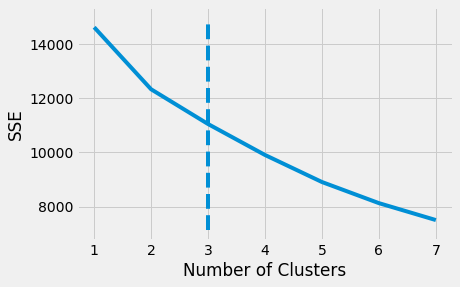

In [21]:
kl = KneeLocator(
    range(1,8), sse, curve="convex", direction="decreasing"
)

print(f"Elbow point is at {kl.elbow:.0f} clusters")

plt.style.use("fivethirtyeight")
plt.plot(range(1,8), sse)
plt.xticks(range(1,8))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.vlines(kl.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()


## Metode Silhouette Score  (Internal)

For n_clusters = 2, the silhouette score is 0.5315
For n_clusters = 3, the silhouette score is 0.5491
For n_clusters = 4, the silhouette score is 0.4248
For n_clusters = 5, the silhouette score is 0.3919
For n_clusters = 6, the silhouette score is 0.3488
For n_clusters = 7, the silhouette score is 0.3334

The best k value is 3 with a silhouette score of 0.5491


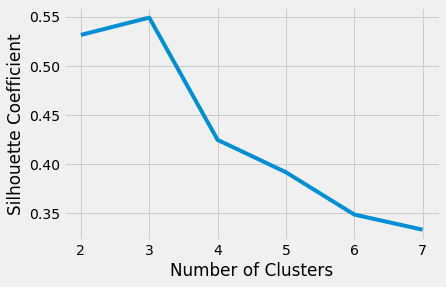

In [22]:
k_range = range(2, 8)
silhouette_coefficients = []
for k in range(2, 8):
    kmeans_pca = KMeans(n_clusters=k, **kmeans_kwargs)
    data = kmeans_pca.fit_transform(pca_ccData)
    score = silhouette_score(data, kmeans_pca.labels_)
    silhouette_coefficients.append(score)
    
    print(f"For n_clusters = {k}, the silhouette score is {score:.4f}")
    
best_k = k_range[np.argmax(silhouette_coefficients)]
best_score = max(silhouette_coefficients)
print(f"\nThe best k value is {best_k} with a silhouette score of {best_score:.4f}")

plt.style.use("fivethirtyeight")
plt.plot(range(2, 8), silhouette_coefficients)
plt.xticks(range(2, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

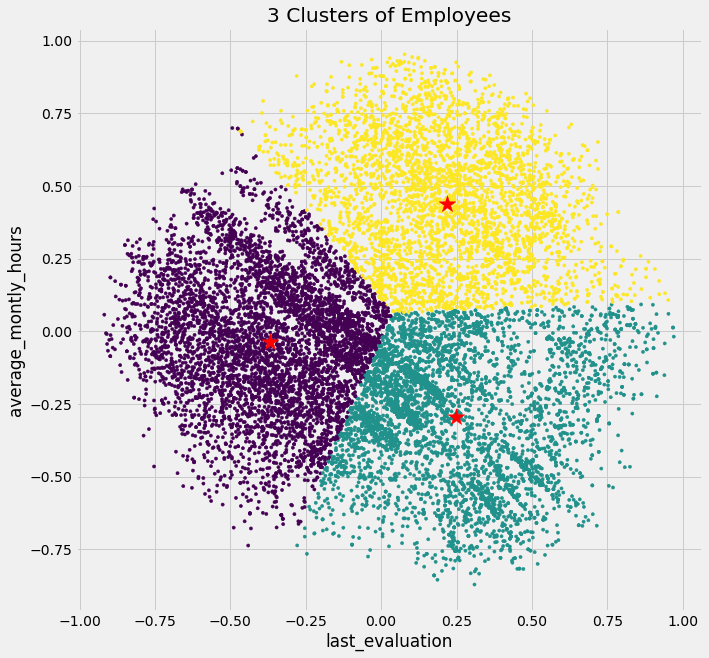

In [23]:
left_emp = pca_ccData[['Components 2', 'Components 4']]
kmeans_pca = KMeans(n_clusters=3).fit(left_emp)
labels = kmeans_pca.labels_
centroids = kmeans_pca.cluster_centers_
pca_ccData['cluster'] = labels
plt.figure(figsize=(10,10))
plt.scatter(left_emp.iloc[:, 0], left_emp.iloc[:, 1], c=labels, cmap='viridis', s=10)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='center')
plt.xlabel('last_evaluation')
plt.ylabel('average_montly_hours')
plt.title('3 Clusters of Employees')
plt.show()

In [24]:
centroids = kmeans_pca.cluster_centers_
density = np.zeros(3)
for i in range(3):
    cluster_data = left_emp[pca_ccData['cluster'] == i]
    kde = gaussian_kde(cluster_data.T)
    density[i] = kde(centroids[i])
    
for i in range(3):
    print(f'Density of centroid {i+1}: {density[i]}')

Density of centroid 1: 2.1203294898429688
Density of centroid 2: 1.5180218063079323
Density of centroid 3: 2.5253072345721534


## Cluster yang paling optimal


In [25]:
kmean_pca = KMeans(n_clusters=3,**kmeans_kwargs)
kmean_pca

y_cluster = kmean_pca.fit_predict(pca_ccData)
#y_cluster
cluster = kmean_pca.cluster_centers_
centroids = np.array(cluster)
labels = kmean_pca.labels_

dframe['Cluster']=labels; pca_ccData['Cluster']=labels
dframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,Cluster
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,0
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.72,0.87,5,223,5,0,0,7,1,1
4,0.37,0.52,2,159,3,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1,1
14995,0.37,0.48,2,160,3,0,0,8,1,1
14996,0.37,0.53,2,143,3,0,0,8,1,1
14997,0.11,0.96,6,280,4,0,0,8,1,1


In [26]:
pca_ccData

,Components 1,Components 2,Components 3,Components 4,Components 5,Components 6,Components 7,Component 8,cluster,Cluster
0,-0.862545,0.185168,0.223197,-0.222353,-0.031881,-0.145458,-0.052988,-0.251521,1,1
1,0.792513,-0.124592,-0.301425,-0.192343,0.043316,-0.004016,0.489370,-0.120614,0,0
2,0.667107,0.332483,-0.275643,-0.539646,-0.127623,-0.107517,-0.217031,0.217951,1,1
3,0.816480,0.048977,0.321528,-0.109116,0.189419,-0.190268,0.399123,0.083408,1,1
4,-0.859168,0.198707,0.218147,-0.234429,-0.052871,-0.131802,-0.051417,-0.253408,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,-0.828410,0.065697,0.280482,-0.289691,0.064087,-0.183651,-0.069085,-0.248052,1,1
14995,-0.844784,0.130238,0.245986,-0.333079,-0.078351,-0.071866,-0.010342,-0.224517,1,1
14996,-0.854574,0.108131,0.247432,-0.304853,0.056189,-0.159025,-0.044936,-0.189431,1,1
14997,0.697818,0.392399,0.155774,-0.509690,-0.075169,-0.168883,-0.289734,0.008871,1,1


In [27]:
kmean_pca.cluster_centers_

array([[ 7.22096219e-02, -3.69131445e-01,  2.75971201e-02,
        -3.45792962e-02,  6.33796625e-03,  1.76737018e-02,
        -1.65958817e-03,  5.28714192e-03,  4.40758541e-14],
       [-6.50147018e-02,  2.48973433e-01,  2.40450911e-02,
        -2.95547577e-01,  1.78051762e-02, -1.13964994e-02,
         5.49787276e-03, -1.27544132e-02,  1.00000000e+00],
       [-2.14480556e-02,  2.19041923e-01, -7.23490689e-02,
         4.38911272e-01, -3.27322662e-02, -1.11752668e-02,
        -4.76026399e-03,  8.91865891e-03,  2.00000000e+00]])

In [28]:
# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 103.32435822486877 seconds


# Membuat Dataset baru dengan label cluster

In [29]:
dframe['Cluster']=dframe['Cluster'].replace([0,1,2],['UnResign','Ragu-ragu','Resign'])

In [30]:
dframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,Cluster
0,0.38,0.53,2,157,3,0,0,7,1,Ragu-ragu
1,0.80,0.86,5,262,6,0,0,7,2,UnResign
2,0.11,0.88,7,272,4,0,0,7,2,Ragu-ragu
3,0.72,0.87,5,223,5,0,0,7,1,Ragu-ragu
4,0.37,0.52,2,159,3,0,0,7,1,Ragu-ragu
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1,Ragu-ragu
14995,0.37,0.48,2,160,3,0,0,8,1,Ragu-ragu
14996,0.37,0.53,2,143,3,0,0,8,1,Ragu-ragu
14997,0.11,0.96,6,280,4,0,0,8,1,Ragu-ragu


In [31]:
pd.DataFrame(dframe).to_csv("kmeans_pca.csv")